In [1]:
import mitsuba as mi

mi.set_variant('scalar_rgb')

# Create an alias for convenience
from mitsuba import ScalarTransform4f as T

scene = mi.load_dict({
    
    'type': 'scene',
    # The keys below correspond to object IDs and can be chosen arbitrarily
    'integrator': {'type': 'ptracer'},
    #'light': {'type': 'constant'},
    'red_face': { #red
        'type': 'obj',
        'filename': './scenes/meshes/cbox_back.obj',
        'bsdf' : {
            'type': 'twosided',
            'material':{
                'type' : 'diffuse',
                'reflectance': {'type': 'rgb', 'value': [1.0, 0.0, 0.0]},
            }
        }
            
    },
    'sensor': {
        'type': 'perspective',
        'fov': 39.3077,
        'to_world': T.look_at(
            origin=[0, 0, 1],
            target=[0, 0, -1],
            up=[0, 1, 0]
        ),
        'sampler': {
            'type': 'independent',
            'sample_count': 16
        },
        'film': {
            'type': 'hdrfilm',
            'width': 256,
            'height': 256,
            'rfilter': {
                'type': 'tent',
            },
            'pixel_format': 'luminance',
        },
    },

    'blue_face': { #blue
        'type': 'obj',
        'filename': './scenes/meshes/cbox_floor.obj',
        'bsdf' : {
            'type': 'twosided',
            'material':{
                'type' : 'diffuse',
                'reflectance': {'type': 'rgb', 'value': [0.0, 0.0, 1.0]},
            }
        }
    },
    'yellow_face': { #yellow
        'type': 'obj',
        'filename': './scenes/meshes/cbox_ceiling.obj',
        'bsdf' : {
            'type': 'twosided',
            'material':{
                'type' : 'diffuse',
                'reflectance': {'type': 'rgb', 'value': [1.0, 1.0, 0.0]},
            }
        }
    },
    'pink_face': { #pink
        'type': 'obj',
        'filename': './scenes/meshes/cbox_greenwall.obj',
        'bsdf' : {
            'type': 'twosided',
            'material':{
                'type' : 'diffuse',
                'reflectance': {'type': 'rgb', 'value': [1.0, 0.0, 1.0]},
            }
        }
    },
    'lightblue_face': { #light blue
        'type': 'obj',
        'filename': './scenes/meshes/cbox_redwall.obj',
        'bsdf' : {
            'type': 'twosided',
            'material':{
                'type' : 'diffuse',
                'reflectance': {'type': 'rgb', 'value': [0.0, 1.0, 1.0]},
            }
        }
    },
    'emitter': {
        'type': 'spot',
        'to_world': mi.ScalarTransform4f.look_at(
            origin=[0, 0, 1],
            target=[0, 0, -1],
            up=[0, 1, 0]
        ),
        'intensity': {
            'type': 'spectrum',
            'value': 200000000.0,
        },
        #'cutoff_angle': 0.09185751583432335
        'cutoff_angle': 0.05

    },
})



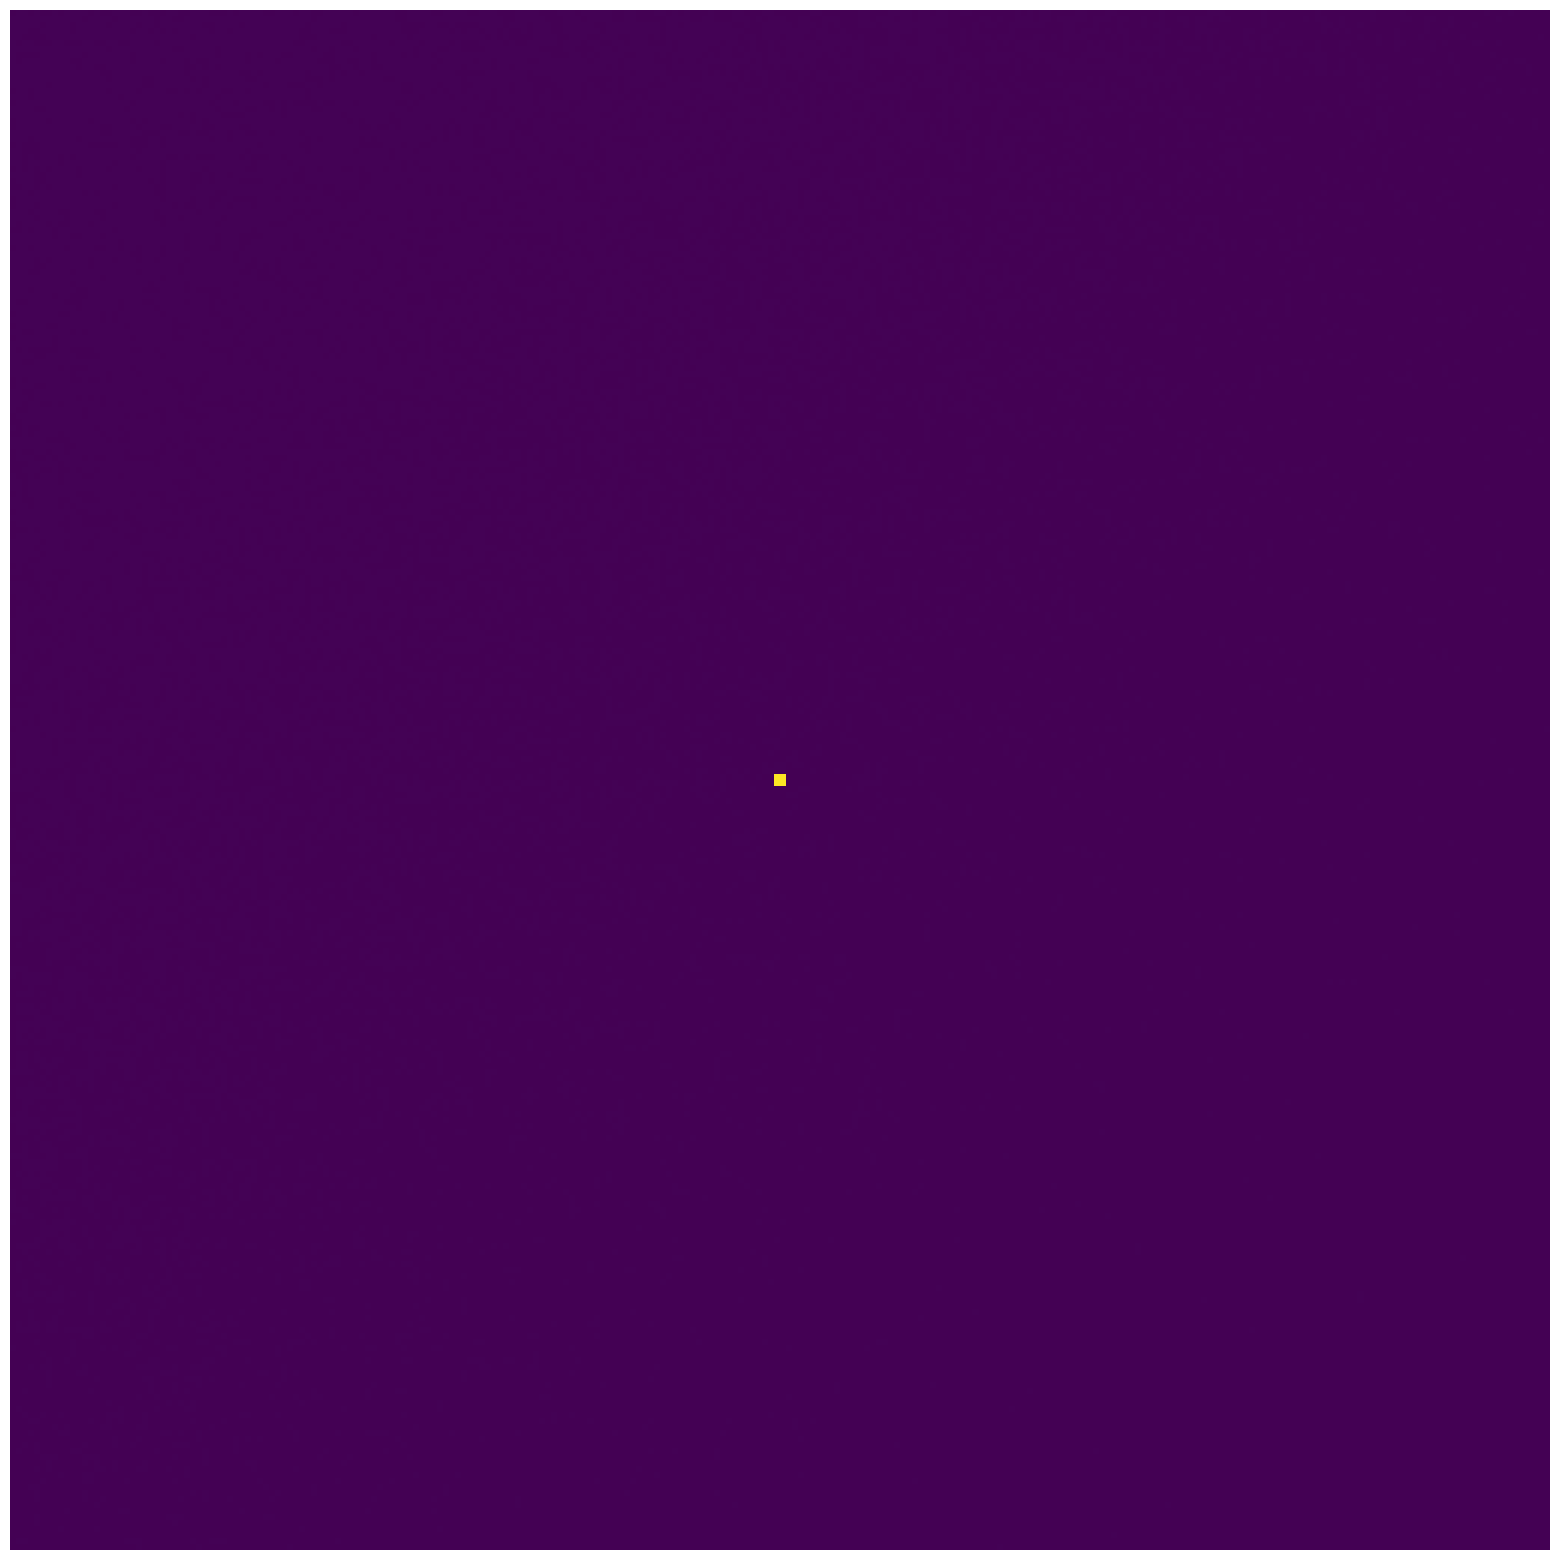

In [2]:
from matplotlib import pyplot as plt
image = mi.render(scene, spp=64)
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(image ** (1.0 / 2.2)); 

In [ ]:
def load_sensor(r, phi, theta):
    # Apply two rotations to convert from spherical coordinates to world 3D coordinates.
    origin = T.rotate([0, 0, 1], phi).rotate([0, 1, 0], theta) @ mi.ScalarPoint3f([0, 0, r])

    return mi.load_dict({
        'type': 'perspective',
        'fov': 39.3077,
        'to_world': T.look_at(
            origin=[0, 0, 1],
            target=[0, 0, -1],
            up=[0, 1, 0]
        ),
        'sampler': {
            'type': 'independent',
            'sample_count': 16
        },
        'film': {
            'type': 'hdrfilm',
            'width': 256,
            'height': 256,
            'rfilter': {
                'type': 'tent',
            },
            'pixel_format': 'rgb',
        },
    })

sensor_count = 1

radius = 6
phis = [20.0 * i for i in range(sensor_count)]
theta = 0.1

sensors = [load_sensor(radius, phi, theta) for phi in phis]

In [ ]:
# sensor_count = 1
# images = [mi.render(scene, spp=16, sensor=sensor) for sensor in sensors]
# params = mi.traverse(scene)
# print(params)

# from matplotlib import pyplot as plt
# import numpy as np

# fig = plt.figure(figsize=(10, 7))
# fig.subplots_adjust(wspace=0, hspace=0)

# for i in range(sensor_count):
#     numpy_image = np.array(images[i])

#     # Normalize to [0, 1]
#     normalized_image = numpy_image / numpy_image.max()
#     ax = fig.add_subplot(4, 6, i + 1).imshow(normalized_image ** (1.0 / 2.2))
#     plt.axis("off")
from matplotlib import pyplot as plt
image = mi.render(scene, spp=64, sensor = sensors[0])
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(image ** (1.0 / 2.2)); 


In [ ]:
print(params['red_face.vertex_positions'])
print(params['lightblue_face.vertex_positions'])
print(params['red_face.faces'])
# center of red face ( on red face ) [0.0, 0.0, -1.0]

In [ ]:
from PIL import Image
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# numpy_image = np.array(images[0])

# # Normalize to [0, 1]
# normalized_image = numpy_image / numpy_image.max()
# plt.imshow(normalized_image ** (1.0 / 2.2))
# plt.show()
images = [np.array(image) for image in images]
print(images[0])
# Check if all images have the same shape
if not all(image.shape == images[0].shape for image in images):
    raise ValueError("Image shapes do not match.")

# Sum of sensor images
result_image_sum = np.sum(images, axis=0)

# Normalize to [0, 1]
result_image_normalized = result_image_sum / result_image_sum.max()

# Convert to uint8 and clip to valid range [0, 255]
result_image_uint8 = np.clip(result_image_normalized * 255.0, 0, 255).astype(np.uint8)

# Save or display the result
result_image = Image.fromarray(result_image_uint8)
plt.imshow(result_image)
plt.show()